In [2]:
!pip install statsmodels



  Using cached statsmodels-0.14.1-cp311-cp311-macosx_11_0_arm64.whl (10.1 MB)
  Using cached patsy-0.5.5-py2.py3-none-any.whl (234 kB)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Step 1: Load and prepare the data
file_path = '/Users/paramanandbhat/Downloads/energy consumption 2.csv' 
data = pd.read_csv(file_path)
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%Y')  

In [4]:
# Step 2: Split the data into training and test sets
split_point = int(len(data) * 0.8)
train_data = data.iloc[:split_point]
test_data = data.iloc[split_point:]

In [9]:
# Step 3: Fit the Holt-Winters model on the training data
ts_train_data = train_data.set_index('DATE')['ENERGY_INDEX']
model = ExponentialSmoothing(ts_train_data, trend="add", seasonal="add", seasonal_periods=12)
fitted_train_model = model.fit(smoothing_level=0.7, smoothing_trend=0.1, smoothing_seasonal=0.4)




/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
# Step 4: Forecast the next 36 months beyond the entire dataset
end_of_dataset = data['DATE'].iloc[-1]
forecast_start_date = end_of_dataset + pd.DateOffset(months=1)
forecast_dates_36_months = pd.date_range(forecast_start_date, periods=36, freq='M')
forecast_36_months = fitted_train_model.forecast(36)


In [7]:
# Creating a DataFrame for the 36-month forecast
forecast_36_months_data = pd.DataFrame({'DATE': forecast_dates_36_months, 'FORECAST': forecast_36_months.values})


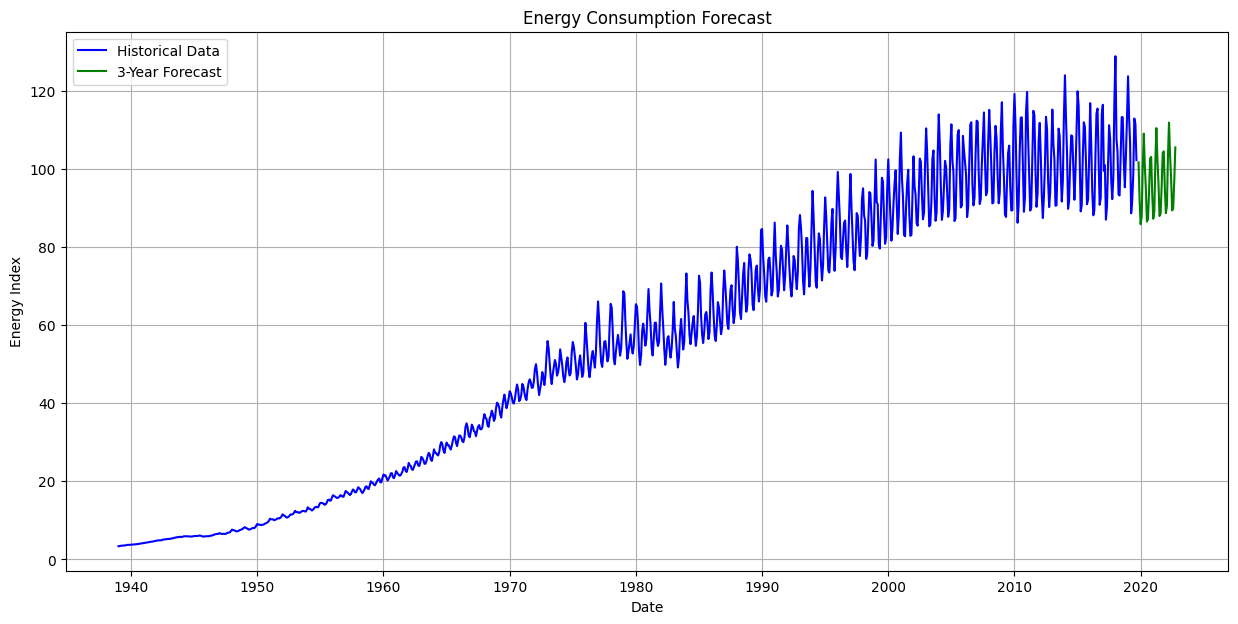

In [10]:
# Step 5: Plot the historical data and the 3-year forecast
plt.figure(figsize=(15, 7))

# Plotting historical data
plt.plot(data['DATE'], data['ENERGY_INDEX'], label='Historical Data', color='blue')

# Plotting the 3-year forecast
plt.plot(forecast_36_months_data['DATE'], forecast_36_months_data['FORECAST'], label='3-Year Forecast', color='green')

plt.title('Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.legend()
plt.grid(True)
plt.show()
